#Task3

1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule.

  data: bioresponse.csv,

  description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 
4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [113]:
# mountiong the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [114]:
data=pd.read_csv("/content/drive/MyDrive/colab data/bioresponse.csv")
X=np.array(data.iloc[:,1:1777].values)
Y=np.array(data.iloc[:,0].values)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25 , random_state=1234 )

In [116]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [117]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [118]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [119]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [132]:
# optimize gradient decendent

def GD(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 1 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [121]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [126]:
# model

def model1(X_train, Y_train, X_test, Y_test,opt, num_iterations = 2000, learning_rate = 0.5, print_cost = False):  
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    num_iterations = 2000
    learning_rate = 0.5
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = SG(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [145]:
j=[0.5,0.1,0.05,0.01,0.005]
for i in j:
  print('Accurecy of the model for learning rate:',i)
  m1 = model1(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = i, print_cost = False)

Accurecy of the model for learning rate: 0.5
train accuracy: 76.67970138642019 %
test accuracy: 68.23027718550107 %
Accurecy of the model for learning rate: 0.1
train accuracy: 76.67970138642019 %
test accuracy: 68.23027718550107 %
Accurecy of the model for learning rate: 0.05
train accuracy: 76.67970138642019 %
test accuracy: 68.23027718550107 %
Accurecy of the model for learning rate: 0.01
train accuracy: 76.67970138642019 %
test accuracy: 68.23027718550107 %
Accurecy of the model for learning rate: 0.005
train accuracy: 76.67970138642019 %
test accuracy: 68.23027718550107 %


In [147]:
dim= X_train.shape[0]
w, b = initialize_with_zeros(dim)
params11, grads11, costs11=GD(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.5, print_cost = False)
params12, grads12, costs12=GD(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.1, print_cost = False)
params13, grads13, costs13=GD(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.05, print_cost = False)
params14, grads14, costs14=GD(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.01, print_cost = False)
params15, grads15, costs15=GD(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.005, print_cost = False)

Text(0.5, 1.0, 'Gradient Decend')

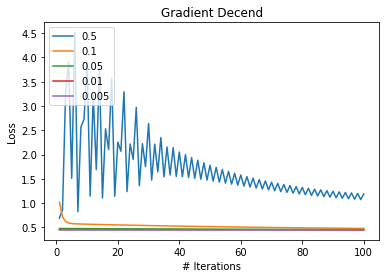

In [148]:
  values=np.arange(1,101)
  plt.plot(values,costs11)
  plt.plot(values,costs12)
  plt.plot(values,costs13)
  plt.plot(values,costs14)
  plt.plot(values,costs15)
  plt.legend(('0.5', "0.1","0.05","0.01","0.005"),loc='upper left')
  plt.ylabel("Loss")
  plt.xlabel("# Iterations")
  plt.title('Gradient Decend')

Stochastic Gradient Decend

In [155]:
def SGD(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        
        for j in range(m):      
            # Cost and gradient calculation 
            grads, cost = propagate(w,b,X,Y)
        
            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]
        
            # update rule
            w -=learning_rate*dw
            b -=learning_rate*db
        
        # Record the costs
        if i % 1 == 0:
            costs.append(cost)
        
             # Print the cost every 100 training iterations
        #if print_cost and i % 1 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [156]:
def model2(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):   
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = SGD(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [161]:
j=[0.5,0.1,0.05,0.01,0.005]
for i in j:
  print('Accurecy of the model for learning rate:',i)
  m1 = model2(X_train, Y_train, X_test, Y_test, num_iterations = 10, learning_rate = i, print_cost = False)

Accurecy of the model for learning rate: 0.5
train accuracy: 91.43263419836474 %
test accuracy: 73.34754797441364 %
Accurecy of the model for learning rate: 0.1
train accuracy: 88.94418769996446 %
test accuracy: 74.84008528784648 %
Accurecy of the model for learning rate: 0.05
train accuracy: 87.30892285815855 %
test accuracy: 75.47974413646055 %
Accurecy of the model for learning rate: 0.01
train accuracy: 84.32278706007821 %
test accuracy: 76.22601279317698 %
Accurecy of the model for learning rate: 0.005
train accuracy: 82.97191610380378 %
test accuracy: 76.43923240938166 %


In [166]:
dim= X_train.shape[0]
w, b = initialize_with_zeros(dim)
params21, grads21, costs21=SGD(w, b, X_train, Y_train, num_iterations=10, learning_rate=0.1, print_cost = False)
params22, grads22, costs22=SGD(w, b, X_train, Y_train, num_iterations=10, learning_rate=0.1, print_cost = False)
params23, grads23, costs23=SGD(w, b, X_train, Y_train, num_iterations=10, learning_rate=0.05, print_cost = False)
params24, grads24, costs24=SGD(w, b, X_train, Y_train, num_iterations=10, learning_rate=0.01, print_cost = False)
params25, grads25, costs25=SGD(w, b, X_train, Y_train, num_iterations=10, learning_rate=0.005, print_cost = False)

Text(0.5, 1.0, 'Stochastic Gradient Descend')

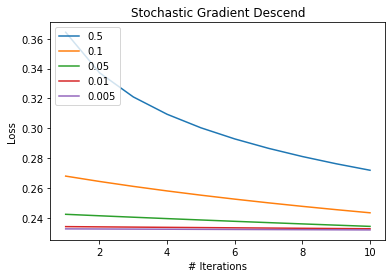

In [168]:
values=np.arange(1,11)
plt.plot(values,costs21)
plt.plot(values,costs22)
plt.plot(values,costs23)
plt.plot(values,costs24)
plt.plot(values,costs25)
plt.legend(('0.5', "0.1","0.05","0.01","0.005"),loc='upper left')
plt.ylabel("Loss")
plt.xlabel("# Iterations")
plt.title('Stochastic Gradient Descend')